In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
diabetes_data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
blood_sugar_data = pd.read_csv('/kaggle/input/ppg-signal-with-blood-sugar-level-data/clean-dataset.csv')
heart_disease_data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [3]:
print(diabetes_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
print(blood_sugar_data)

        PPG_Signal  Patient_Id  Heart_Rate  Systolic_Peak  Diastolic_Peak  \
0              511           1        77.0          522.0           505.0   
1              511           1        77.0          522.0           505.0   
2              511           1        77.0          522.0           505.0   
3              511           1        77.0          522.0           505.0   
4              511           1        77.0          522.0           505.0   
...            ...         ...         ...            ...             ...   
844941         513          23        83.0          516.0           510.0   
844942         513          23        83.0          516.0           510.0   
844943         513          23        83.0          516.0           510.0   
844944         513          23        83.0          516.0           510.0   
844945         513          23        83.0          516.0           510.0   

        Pulse_Area  index  Gender  Age  Glucose_level  Height  Weight      

In [5]:
print(heart_disease_data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [6]:
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
blood_sugar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844946 entries, 0 to 844945
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PPG_Signal      844946 non-null  int64  
 1   Patient_Id      844946 non-null  int64  
 2   Heart_Rate      844946 non-null  float64
 3   Systolic_Peak   844946 non-null  float64
 4   Diastolic_Peak  844946 non-null  float64
 5   Pulse_Area      844946 non-null  float64
 6   index           844946 non-null  int64  
 7   Gender          844946 non-null  int64  
 8   Age             844946 non-null  int64  
 9   Glucose_level   844946 non-null  int64  
 10  Height          844946 non-null  int64  
 11  Weight          844946 non-null  int64  
 12  pl              844946 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 83.8 MB


Checking for null values in blood sugar dataset




In [8]:
blood_sugar_data.isna().sum()

PPG_Signal        0
Patient_Id        0
Heart_Rate        0
Systolic_Peak     0
Diastolic_Peak    0
Pulse_Area        0
index             0
Gender            0
Age               0
Glucose_level     0
Height            0
Weight            0
pl                0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def quick_eda(df, name):
    print(f"\n===== {name.upper()} — BASIC INFO =====")
    print(df.info())
    
    print(f"\n===== {name.upper()} — NULL VALUE SUMMARY =====")
    nulls = df.isnull().sum()
    nulls = nulls[nulls > 0].sort_values(ascending=False)
    if not nulls.empty:
        print(nulls)
    else:
        print("No missing values found.")
    
    print(f"\n===== {name.upper()} — DESCRIPTIVE STATS =====")
    print(df.describe().T)


# Run for each dataset before preprocessing
quick_eda(blood_sugar_data, "Blood Sugar")
quick_eda(diabetes_data, "Diabetes")
quick_eda(heart_disease_data, "Heart Disease")



===== BLOOD SUGAR — BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844946 entries, 0 to 844945
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PPG_Signal      844946 non-null  int64  
 1   Patient_Id      844946 non-null  int64  
 2   Heart_Rate      844946 non-null  float64
 3   Systolic_Peak   844946 non-null  float64
 4   Diastolic_Peak  844946 non-null  float64
 5   Pulse_Area      844946 non-null  float64
 6   index           844946 non-null  int64  
 7   Gender          844946 non-null  int64  
 8   Age             844946 non-null  int64  
 9   Glucose_level   844946 non-null  int64  
 10  Height          844946 non-null  int64  
 11  Weight          844946 non-null  int64  
 12  pl              844946 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 83.8 MB
None

===== BLOOD SUGAR — NULL VALUE SUMMARY =====
No missing values found.

===== BLOOD SUGAR — DESCRIPTIVE S

In [10]:
heart_disease_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Checking for null values in diabetes dataset

In [11]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values


Checking for duplicate values in the datasets

In [12]:
diabetes_data.duplicated().sum()

0

In [13]:
heart_disease_data.duplicated().sum()

723

In [14]:
blood_sugar_data.duplicated().sum()

0

Removing duplicate values in heart_disease dataset

In [15]:
heart_disease_data.drop_duplicates(inplace=True)


Removed duplicate values

In [16]:
heart_disease_data.duplicated().sum()

0

DATA VISUALIZATION

In [17]:
import seaborn as sns


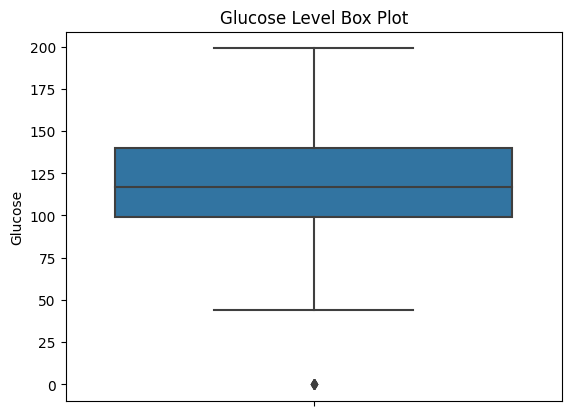

In [18]:
sns.boxplot(y=diabetes_data['Glucose'])
plt.title('Glucose Level Box Plot')
plt.show()



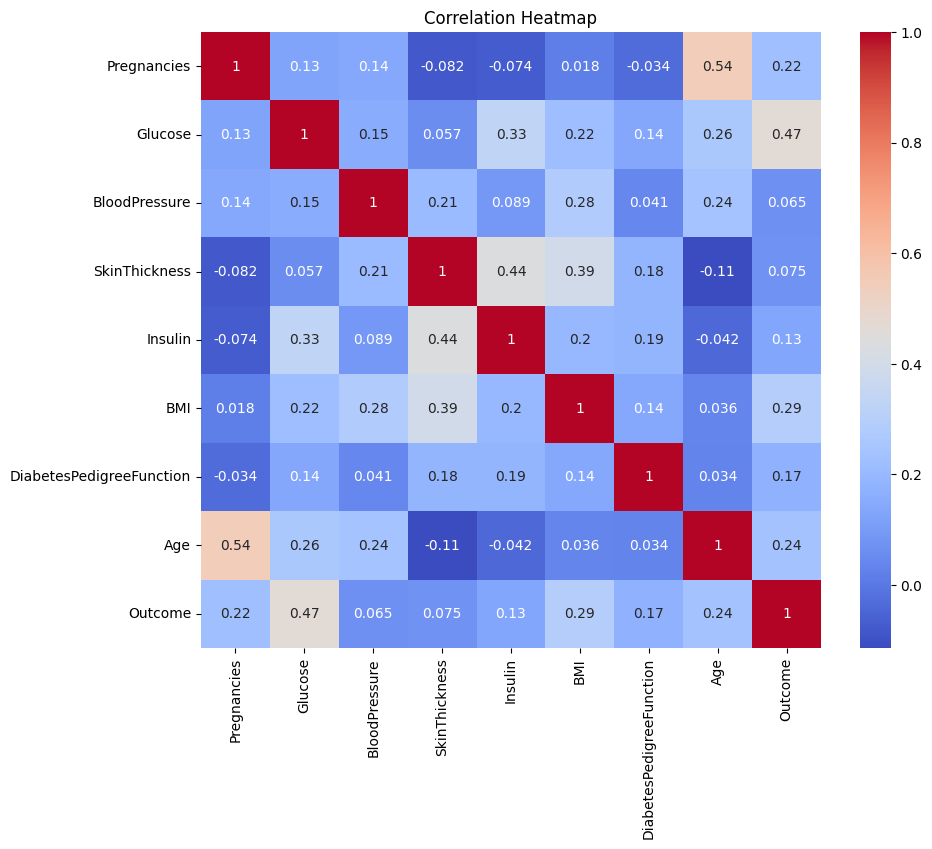

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


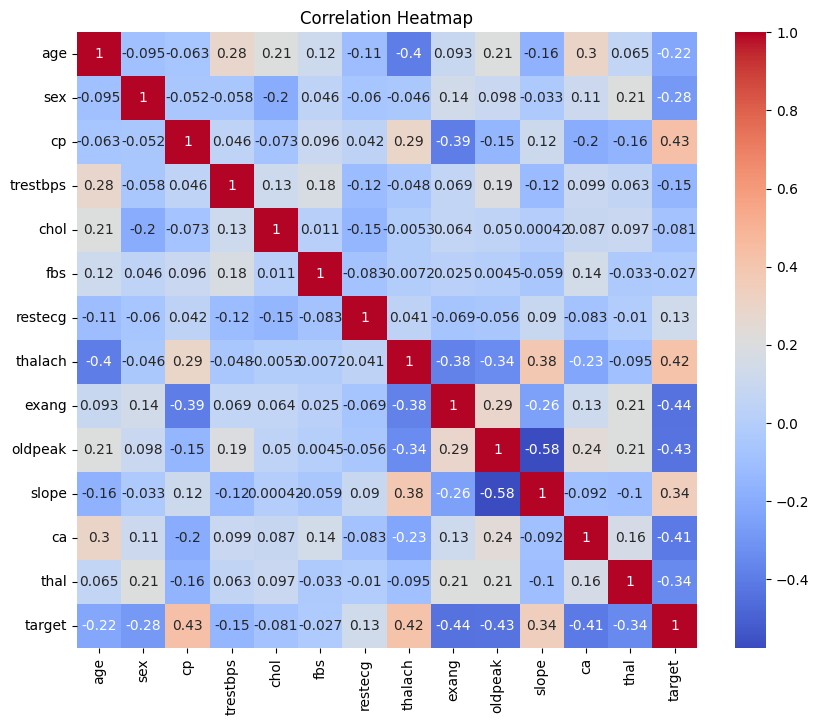

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [21]:
print(blood_sugar_data.dtypes)



PPG_Signal          int64
Patient_Id          int64
Heart_Rate        float64
Systolic_Peak     float64
Diastolic_Peak    float64
Pulse_Area        float64
index               int64
Gender              int64
Age                 int64
Glucose_level       int64
Height              int64
Weight              int64
pl                  int64
dtype: object


Converting object datatype to float

In [22]:
blood_sugar_data = blood_sugar_data.select_dtypes(include=['float64', 'int64'])


In [23]:
print(blood_sugar_data.dtypes)

PPG_Signal          int64
Patient_Id          int64
Heart_Rate        float64
Systolic_Peak     float64
Diastolic_Peak    float64
Pulse_Area        float64
index               int64
Gender              int64
Age                 int64
Glucose_level       int64
Height              int64
Weight              int64
pl                  int64
dtype: object


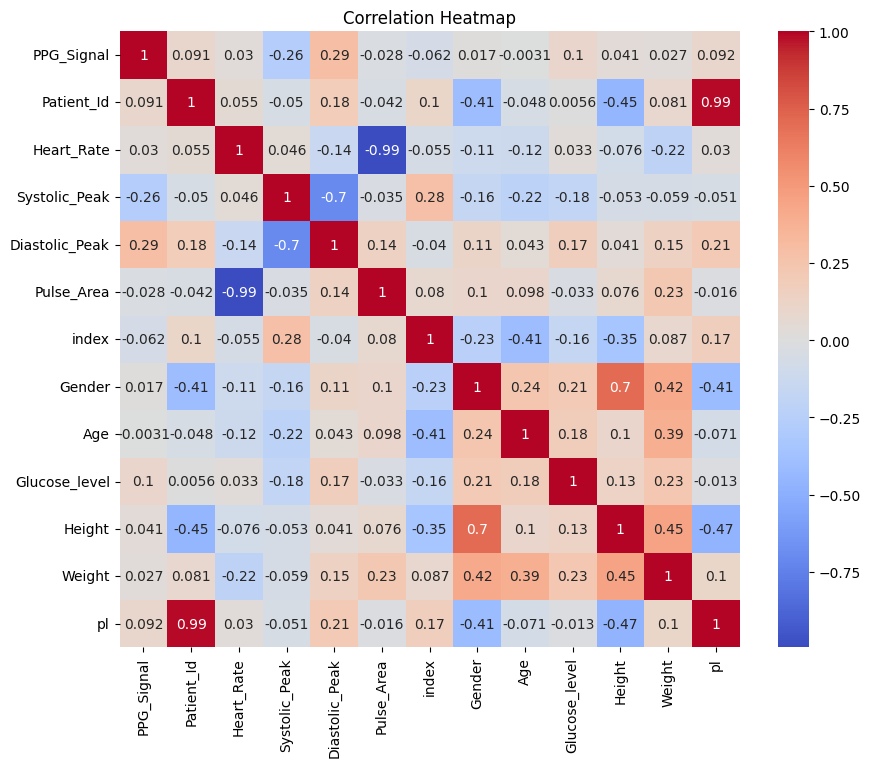

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(blood_sugar_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Pairplot 

Here blue represents non diabetic people and orange represents
diabetic people

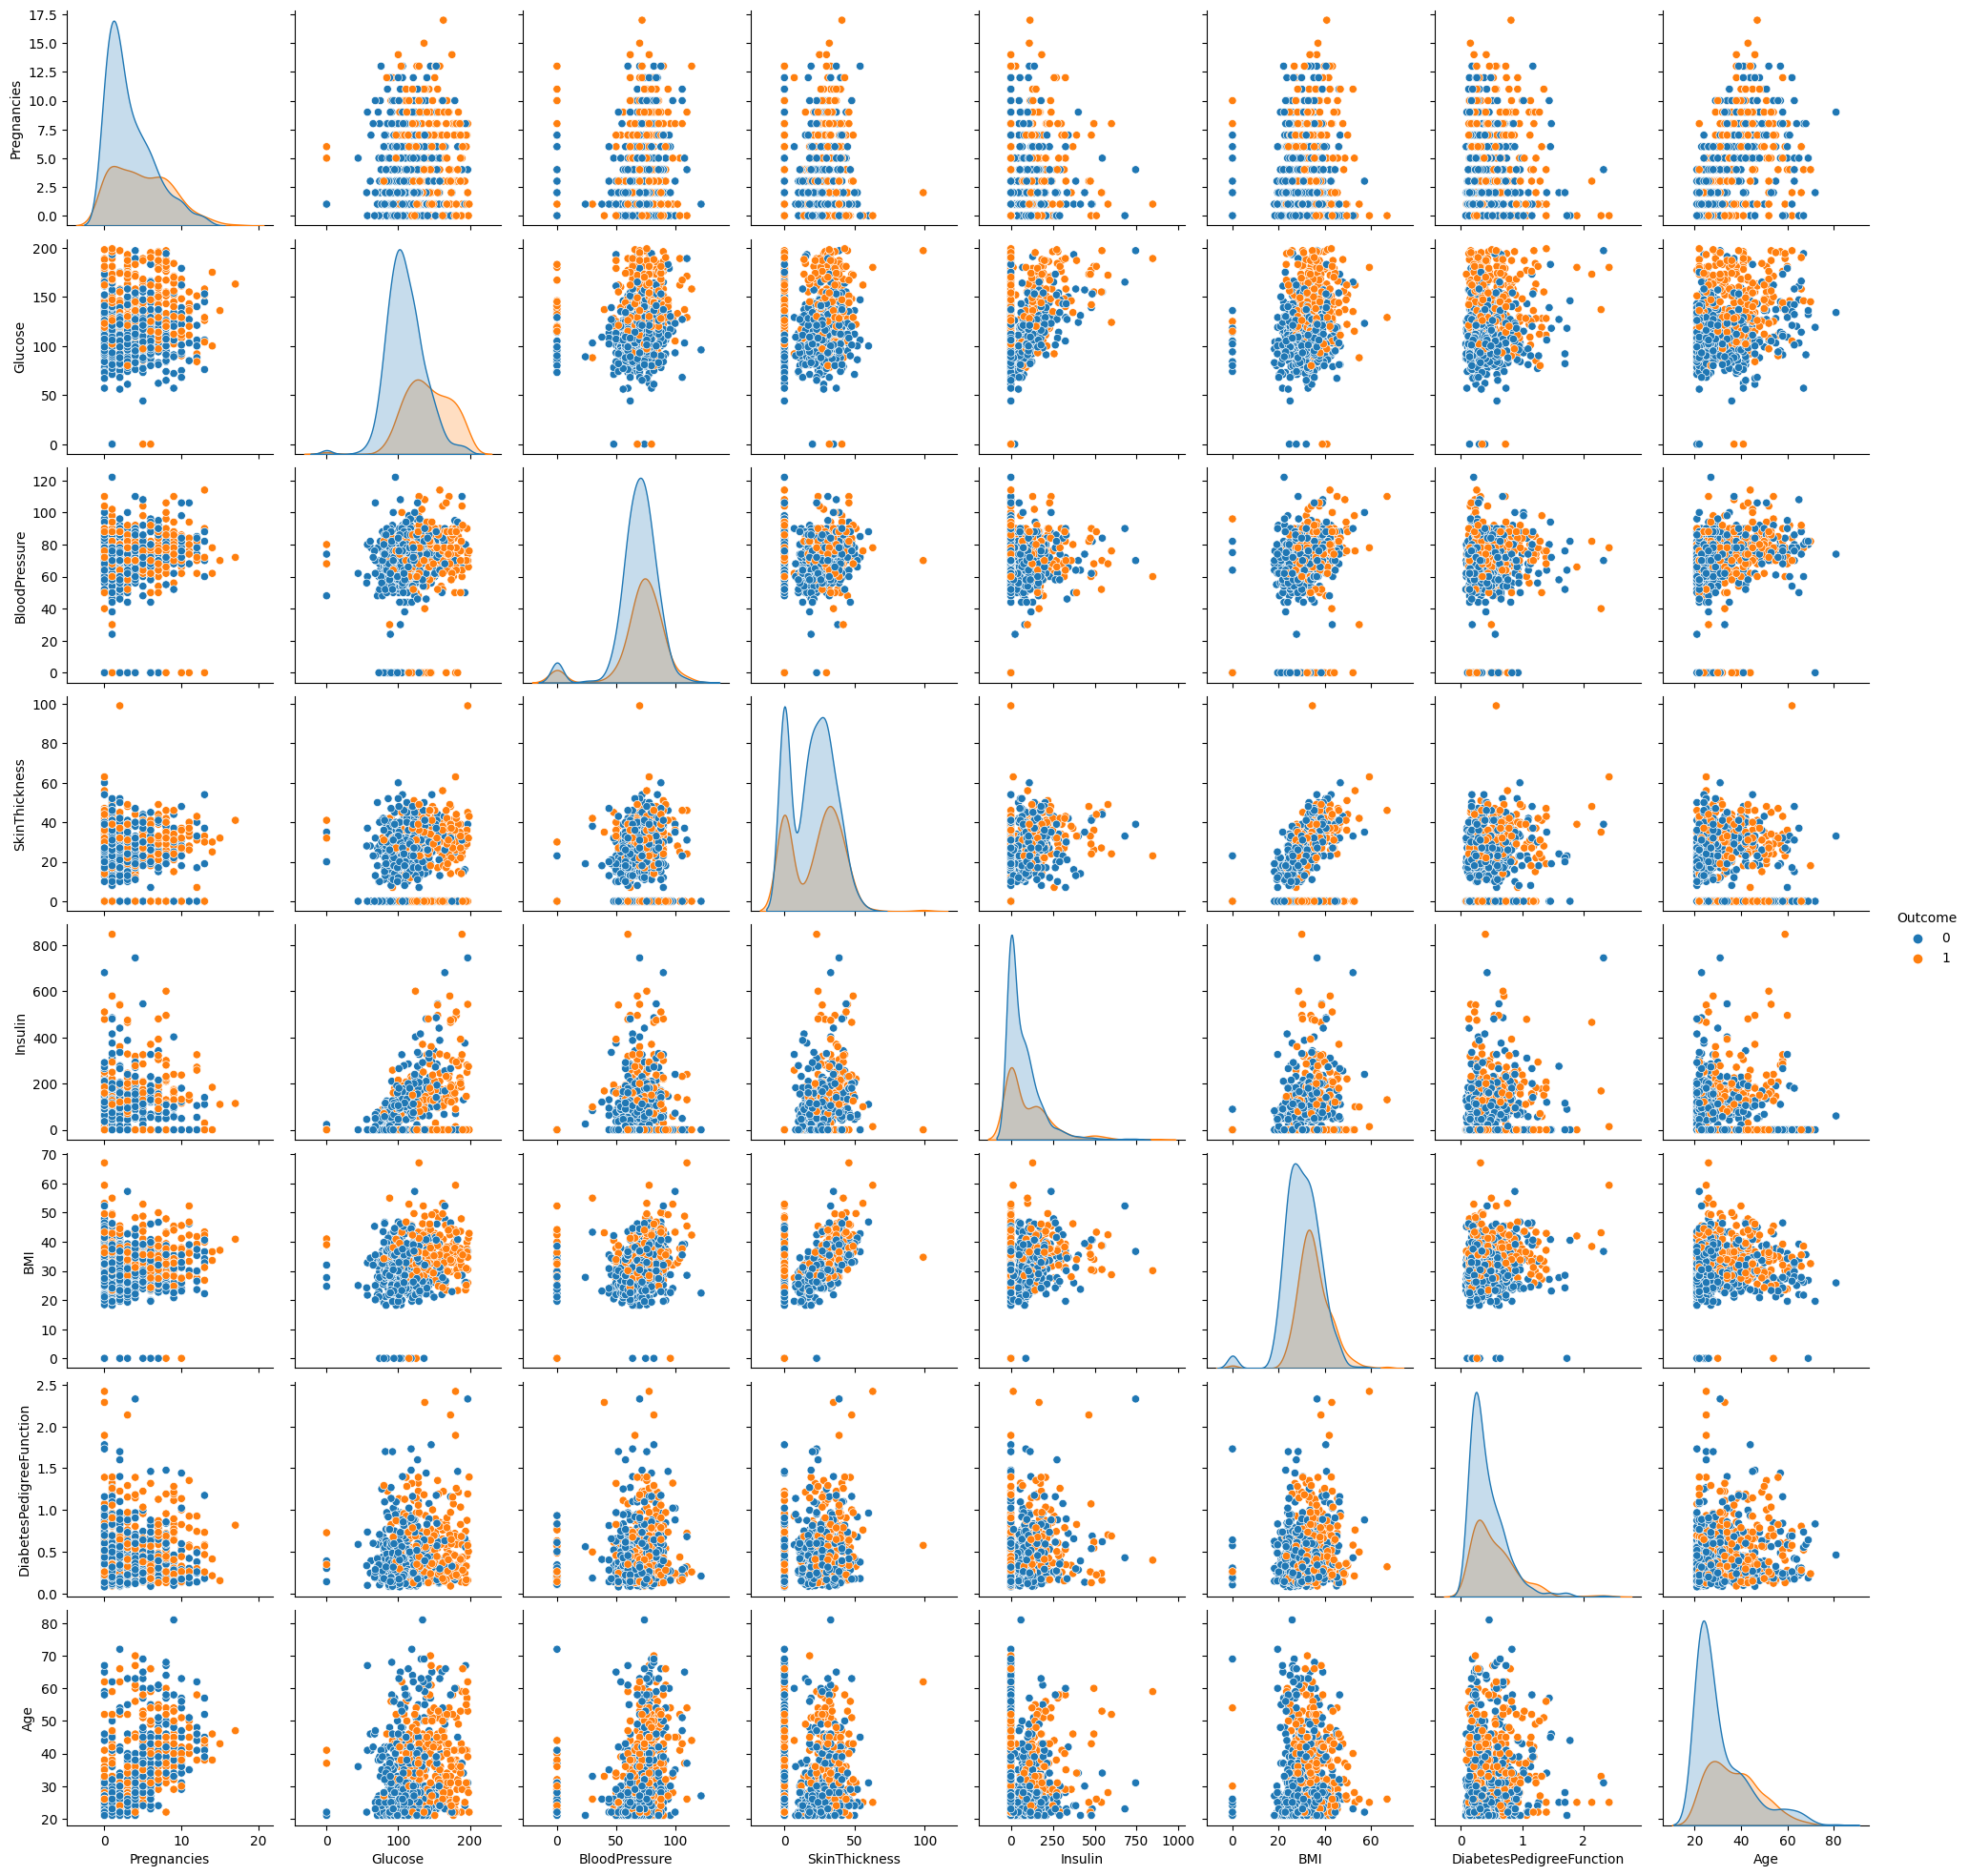

In [25]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(diabetes_data, hue='Outcome')
plt.show()


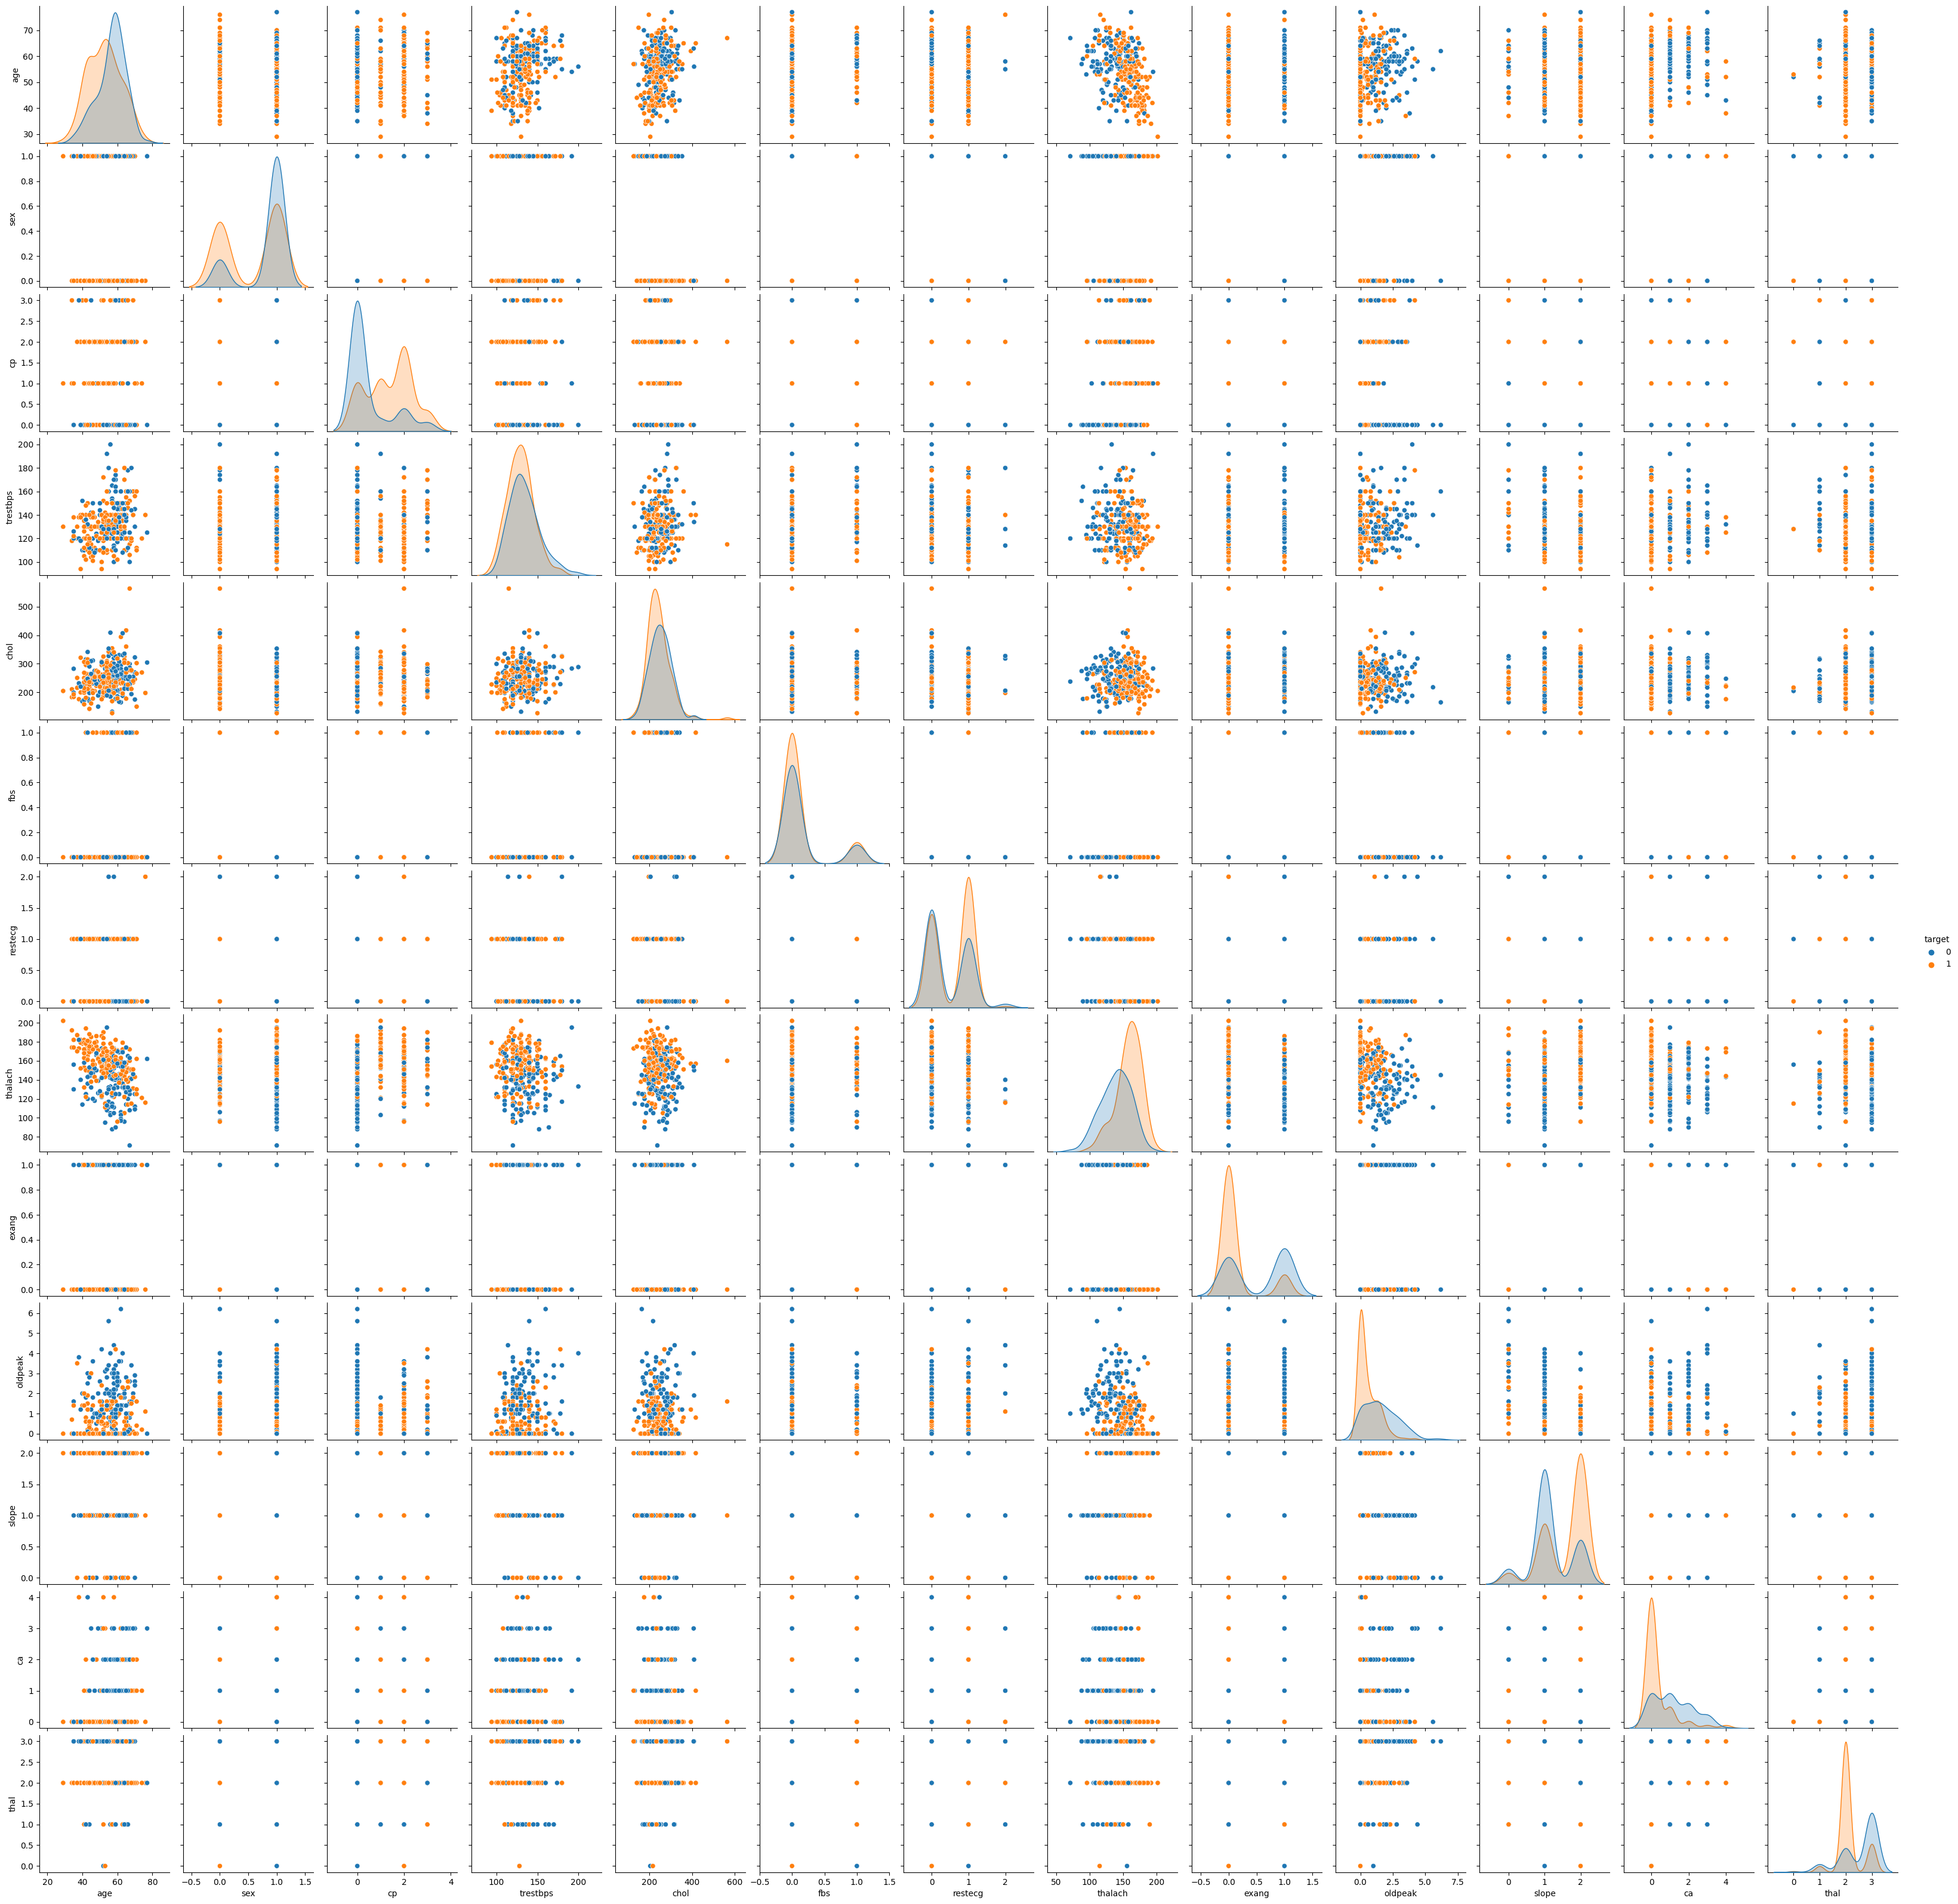

In [26]:
sns.pairplot(data=heart_disease_data, hue='target', diag_kind='kde')
plt.show()


In [27]:
from sklearn.model_selection import  train_test_split
from xgboost import XGBClassifier

X = diabetes_data.drop("Outcome", axis =1)
y = diabetes_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
model = XGBClassifier(use_label_encoder = False, eval_metrics = 'logloss',random_state = 42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Finding maximum training scores

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



Finding maximum test scores (Accuracy)

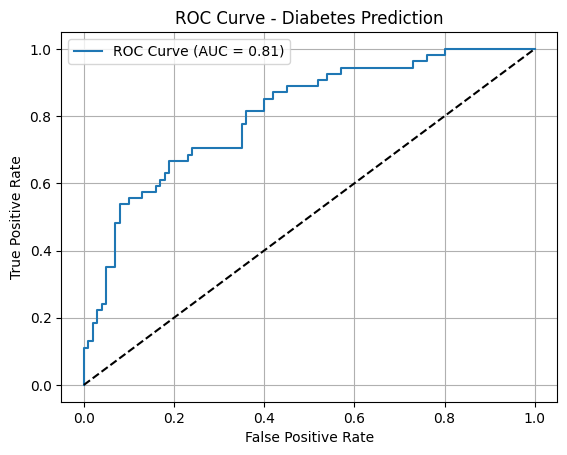

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Diabetes Prediction")
plt.legend()
plt.grid()
plt.show()



SHAP for predicting the most important feature


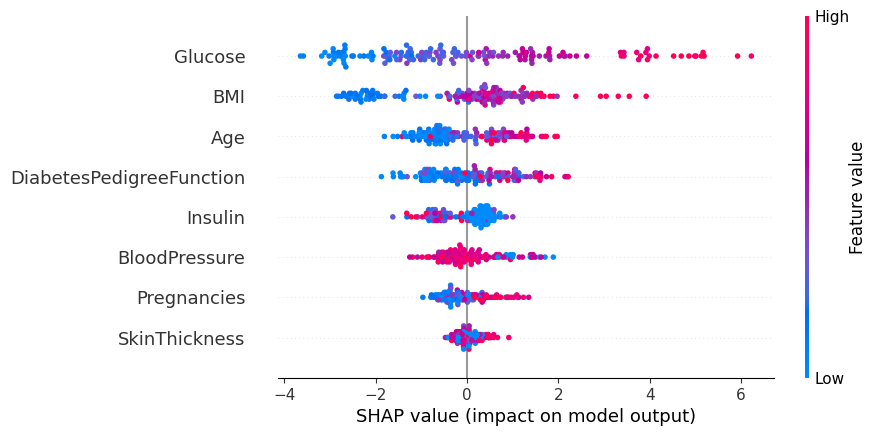

In [31]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)


In [32]:
shap.plots.waterfall(shap_values[0])


In [33]:

print(heart_disease_data.info())  
print(heart_disease_data.describe())  
print(heart_disease_data.head()) 

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.5

In [34]:
print(heart_disease_data.columns)  # Display column names


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Dropping target values


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X1 = heart_disease_data.drop("target" , axis =1)
y1 = heart_disease_data['target']

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, stratify=y1, random_state=42)

Using random forest algorithm to classify heart_disease_data


In [36]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability = True, random_state=42)
svm_model.fit(X1_train, y1_train)


SVC(probability=True, random_state=42)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



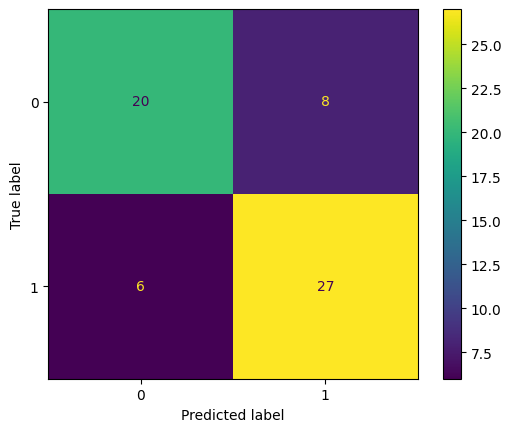

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y1_pred = svm_model.predict(X1_test)

print(classification_report(y1_test, y1_pred))
ConfusionMatrixDisplay.from_estimator(svm_model, X1_test, y1_test)


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X1_train, y1_train)

# ✅ This is your best model (trained and tuned)
best_svm = grid_search.best_estimator_

# You can print the best parameters:
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

AUC Score: 0.8809523809523809


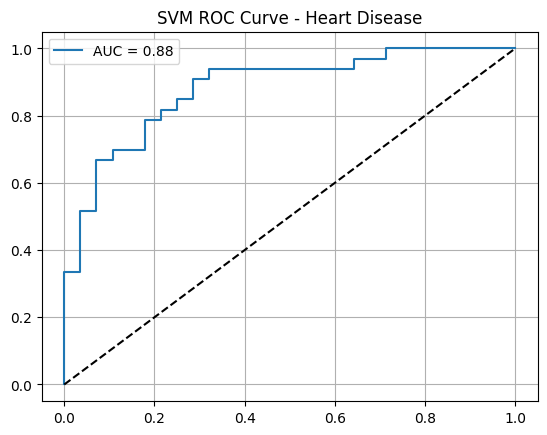

In [39]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y1_pred = best_svm.predict(X1_test)
y1_prob = best_svm.predict_proba(X1_test)[:, 1]

print(classification_report(y1_test, y1_pred))
print("AUC Score:", roc_auc_score(y1_test, y1_prob))

# Plot ROC
fpr, tpr, _ = roc_curve(y1_test, y1_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y1_test, y1_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("SVM ROC Curve - Heart Disease")
plt.grid()
plt.show()


ML model for blood sugar dataset

In [40]:
blood_sugar_data.shape

(844946, 13)

In [41]:
blood_sugar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844946 entries, 0 to 844945
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PPG_Signal      844946 non-null  int64  
 1   Patient_Id      844946 non-null  int64  
 2   Heart_Rate      844946 non-null  float64
 3   Systolic_Peak   844946 non-null  float64
 4   Diastolic_Peak  844946 non-null  float64
 5   Pulse_Area      844946 non-null  float64
 6   index           844946 non-null  int64  
 7   Gender          844946 non-null  int64  
 8   Age             844946 non-null  int64  
 9   Glucose_level   844946 non-null  int64  
 10  Height          844946 non-null  int64  
 11  Weight          844946 non-null  int64  
 12  pl              844946 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 83.8 MB


In [42]:
blood_sugar_data.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Age',
       'Glucose_level', 'Height', 'Weight', 'pl'],
      dtype='object')

Splitting the data and assigning glucose levels to y2

In [43]:
blood_sugar_data = blood_sugar_data.drop(columns=['Patient_Id', 'index', 'pl'])


In [44]:
blood_sugar_data.columns

Index(['PPG_Signal', 'Heart_Rate', 'Systolic_Peak', 'Diastolic_Peak',
       'Pulse_Area', 'Gender', 'Age', 'Glucose_level', 'Height', 'Weight'],
      dtype='object')

In [45]:
blood_sugar_data['Glucose_level'].describe()



count    844946.000000
mean        115.405805
std          19.077954
min          88.000000
25%         102.000000
50%         110.000000
75%         128.000000
max         183.000000
Name: Glucose_level, dtype: float64

In [46]:
print(blood_sugar_data.columns)  # Check if PPG_Signal exists
print(blood_sugar_data.head())   # See what the column looks like


Index(['PPG_Signal', 'Heart_Rate', 'Systolic_Peak', 'Diastolic_Peak',
       'Pulse_Area', 'Gender', 'Age', 'Glucose_level', 'Height', 'Weight'],
      dtype='object')
   PPG_Signal  Heart_Rate  Systolic_Peak  Diastolic_Peak  Pulse_Area  Gender  \
0         511        77.0          522.0           505.0       393.0       1   
1         511        77.0          522.0           505.0       393.0       1   
2         511        77.0          522.0           505.0       393.0       1   
3         511        77.0          522.0           505.0       393.0       1   
4         511        77.0          522.0           505.0       393.0       1   

   Age  Glucose_level  Height  Weight  
0   38             99     180      53  
1   38            102     180      53  
2   38            103     180      53  
3   38            128     180      53  
4   38            130     180      53  


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor

# -------------------
# 1. Load dataset
# -------------------
df = blood_sugar_data.copy()

# -------------------
# 2. Basic feature engineering
# -------------------
df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)
df["pulse_pressure"] = df["Systolic_Peak"] - df["Diastolic_Peak"]
df["systolic_diastolic_ratio"] = df["Systolic_Peak"] / df["Diastolic_Peak"]
df["hr_pulsearea"] = df["Heart_Rate"] * df["Pulse_Area"]

# -------------------
# 3. Polynomial features for numeric cols
# -------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("Glucose_level")  # exclude target

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(df[num_cols])
poly_feature_names = poly.get_feature_names_out(num_cols)

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)

# Merge poly features with categorical cols and target
df_poly = pd.concat([df.drop(columns=num_cols), poly_df], axis=1)

# -------------------
# 4. Train/test split
# -------------------
X2 = df_poly.drop(columns=["Glucose_level"])
y2 = df["Glucose_level"]

cat_features = X2.select_dtypes(include=["object"]).columns.tolist()

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# -------------------
# 5. Train CatBoost
# -------------------
model = CatBoostRegressor(
    iterations=1000,
    depth=8,
    learning_rate=0.05,
    loss_function="MAE",
    cat_features=cat_features,
    verbose=200
)

model.fit(X2_train, y2_train)

# -------------------
# 6. Evaluate
# -------------------
y2_pred = model.predict(X2_test)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# -------------------
# 7. Feature importance
# -------------------
feat_importance = pd.DataFrame({
    "feature": X2.columns,
    "importance": model.get_feature_importance()
}).sort_values(by="importance", ascending=False)

print("\nTop 10 Important Features:")
print(feat_importance.head(10))


0:	learn: 13.6539917	total: 288ms	remaining: 4m 47s
200:	learn: 11.0479752	total: 31s	remaining: 2m 3s
400:	learn: 11.0372883	total: 1m	remaining: 1m 30s
600:	learn: 11.0321929	total: 1m 27s	remaining: 58.4s
800:	learn: 11.0301430	total: 1m 56s	remaining: 28.8s
999:	learn: 11.0272425	total: 2m 23s	remaining: 0us
MAE: 11.0889
R²: 0.2601

Top 10 Important Features:
                  feature  importance
95     BMI pulse_pressure    4.903681
93    Weight hr_pulsearea    4.781611
53  Diastolic_Peak Height    4.742455
44   Systolic_Peak Weight    4.469855
91  Weight pulse_pressure    3.619528
80     Age pulse_pressure    3.289505
6                     Age    2.726085
52     Diastolic_Peak Age    2.501959
54  Diastolic_Peak Weight    2.461310
89               Weight^2    2.253215


In [58]:
print(df.columns)


Index(['PPG_Signal', 'Heart_Rate', 'Systolic_Peak', 'Diastolic_Peak',
       'Pulse_Area', 'Gender', 'Age', 'Glucose_level', 'Height', 'Weight',
       'BMI', 'pulse_pressure', 'systolic_diastolic_ratio', 'hr_pulsearea'],
      dtype='object')


In [60]:
from sklearn.pipeline import Pipeline


In [67]:
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#  Columns
num_cols = ['PPG_Signal', 'Heart_Rate', 'Systolic_Peak', 'Diastolic_Peak',
            'Pulse_Area', 'Age', 'Height', 'Weight', 'BMI',
            'pulse_pressure', 'systolic_diastolic_ratio', 'hr_pulsearea']

cat_cols = ['Gender']

# Preprocessor with OHE
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

#  Fit on training features (excluding target)
X2 = df.drop(columns=["Glucose_level"])
y2 = df["Glucose_level"]

preprocessor.fit(X2)

# Save for reuse
joblib.dump(preprocessor, "preprocessor.pkl")

# Define prediction function
def predict_blood_sugar(input_data: dict):
    input_df = pd.DataFrame([input_data])
    processed = preprocessor.transform(input_df)
    return blood_sugar_model.predict(processed)[0]


In [64]:
test_input = {
    "PPG_Signal": -0.1,
    "Heart_Rate": 72,
    "Systolic_Peak": 120,
    "Diastolic_Peak": 80,
    "Pulse_Area": 0.5,
    "Gender": "Male",
    "Age": 40,
    "Height": 170,
    "Weight": 70,
    "BMI": 24.2,
    "pulse_pressure": 40,
    "systolic_diastolic_ratio": 1.5,
    "hr_pulsearea": 0.8
}

print("Predicted Blood Sugar:", predict_blood_sugar(test_input))


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Male'

In [50]:
import joblib


joblib.dump(heart_disease_data, "heart_disease_model.pkl")
joblib.dump(diabetes_data, "diabetes_data.pkl")

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [56]:
print(preprocessor)
print(blood_sugar_model)


NameError: name 'preprocessor' is not defined

In [55]:
def predict_blood_sugar(input_data: dict):
    """
    input_data: dict with keys same as dataset features
    Example:
        {
          'PPG_Signal': -0.10,
          'Heart_Rate': 72,
          'Systolic_Peak': 120,
          'Diastolic_Peak': 80,
          'Pulse_Area': 0.5,
          'Gender': 1,
          'Age': 45,
          'Height': 170,
          'Weight': 70
        }
    """
    import pandas as pd
    
    # Convert dict → DataFrame (1-row)
    X2 = pd.DataFrame([input_data])

    # Preprocess with the same pipeline used in training
    processed = preprocessor.transform(X2)

    # Predict
    prediction = blood_sugar_model.predict(processed)
    return prediction[0]




NameError: name 'preprocessor' is not defined